In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import pylab as py
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.cluster import KMeans  
from scipy.spatial.distance import cdist 
from sklearn.datasets import make_blobs 
from sklearn.cluster import AgglomerativeClustering 
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from keplergl import KeplerGl
import geopandas as gpdo

In [2]:
data = pd.read_csv('uber-raw-data-apr14.csv')

In [3]:
data.shape

(564516, 4)

In [4]:
data.head(10)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
5,4/1/2014 0:33:00,40.7383,-74.0403,B02512
6,4/1/2014 0:39:00,40.7223,-73.9887,B02512
7,4/1/2014 0:45:00,40.7620,-73.9790,B02512
8,4/1/2014 0:55:00,40.7524,-73.9960,B02512
9,4/1/2014 1:01:00,40.7575,-73.9846,B02512


In [5]:
cluster = data[['Lat','Lon']]
cluster.dtypes

Lat    float64
Lon    float64
dtype: object

In [6]:
KMeans(algorithm= 'auto', copy_x=True, init='k_means++', max_iter=300,n_clusters=14, n_init=10,n_jobs=None, precompute_distances = 'auto',random_state=None, tol = 0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k_means++', max_iter=300,
       n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
pca=PCA(n_components=2)
pca.fit(cluster)
x_red=pca.transform(cluster)
x_red.shape

(564516, 2)

In [8]:
x_red

array([[ 0.02363917,  0.02760861],
       [-0.0583854 , -0.00977347],
       [-0.0109748 , -0.00775228],
       ...,
       [-0.01179968,  0.0050215 ],
       [ 0.03233383, -0.06649411],
       [ 0.0128253 , -0.05288282]])

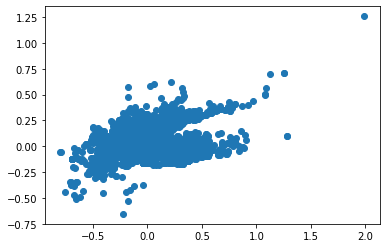

In [9]:
py.scatter(x_red[:,0],x_red[:,1],cmap='RdYlBu')
py.show()

In [10]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=3,random_state=0)
k_means.fit(cluster)
y_pred=k_means.predict(cluster)

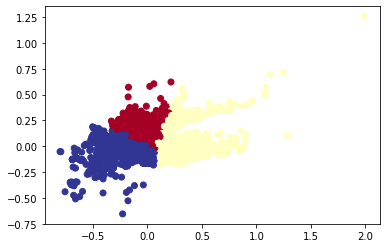

In [11]:
py.scatter(x_red[:,0],x_red[:,1],c=y_pred,cmap='RdYlBu')

In [12]:
df = pd.DataFrame(x_red)
d = df.to_numpy()

In [13]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster)
    Sum_of_squared_distances.append(km.inertia_)

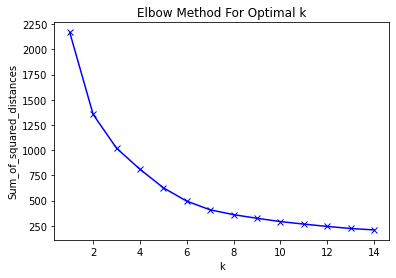

In [14]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [15]:
kmeans = KMeans(n_clusters=6, max_iter=300, random_state = 12345)
kmeans.fit(cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=12345, tol=0.0001, verbose=0)

In [16]:
centroids = kmeans.cluster_centers_
centroids

array([[ 40.73110836, -73.99862011],
       [ 40.65955489, -73.77408093],
       [ 40.79811182, -73.86886974],
       [ 40.76553564, -73.97283453],
       [ 40.68858812, -73.96552836],
       [ 40.7005414 , -74.20167303]])

In [17]:
new_location = [(40.6556,-73.5631)]
kmeans.predict(new_location)

array([1])

In [18]:
clocation = pd.DataFrame(centroids, columns =['Lat', 'Lon'])
clocation

,Lat,Lon
0,40.731108,-73.998620
1,40.659555,-73.774081
2,40.798112,-73.868870
3,40.765536,-73.972835
4,40.688588,-73.965528
5,40.700541,-74.201673


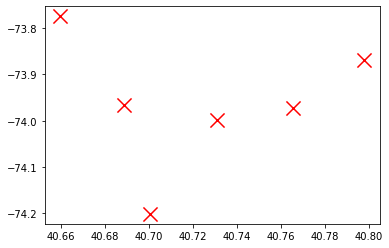

In [22]:
plt.scatter(clocation['Lat'], clocation['Lon'], marker = "x", color = 'R', s = 200)
plt.show()

In [27]:

import pandas as pd #importing the Pandas Library as 'pd'
from keplergl import KeplerGl #importing KeplerGl
import geopandas as gpd #importing geopandas as 'gpd'
#Pandas in action below
df = pd.read_csv('kmean-apr14-loc.csv')#Reading the active construction data set into pandas for processing
df.head()#Checking to see if data was properly imported!

,longitutde,latitude
0,-73.998620,40.731108
1,-73.774081,40.659555
2,-73.868870,40.798112
3,-73.972835,40.765536
4,-73.965528,40.688588


In [28]:

#Create a basemap 
map = KeplerGl(height=600, width=800)
map #show the map
import pandas as pd #importing the Pandas Library as 'pd'
from keplergl import KeplerGl #importing KeplerGl
import geopandas as gpd #importing geopandas as 'gpd'
#Pandas in action below
df = pd.read_csv('kmean-apr14-loc.csv')#Reading the active construction data set into pandas for processing
df.head()#Checking to see if data was properly imported!

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=600)

In [30]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitutde, df.latitude))

In [31]:
map.add_data(data=gdf, name="kmean-apr14") 